In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [6]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Only rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/15


C:\Users\T.Tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 453s 3s/step - accuracy: 0.4523 - loss: 1.1792 - val_accuracy: 0.4984 - val_loss: 1.0011
Epoch 2/15
  1/160 ━━━━━━━━━━━━━━━━━━━━ 2:11 826ms/step - accuracy: 0.6875 - loss: 0.9349

c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.9349 - val_accuracy: 0.5806 - val_loss: 1.1320
Epoch 3/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 160s 983ms/step - accuracy: 0.5056 - loss: 1.0276 - val_accuracy: 0.5160 - val_loss: 0.9749
Epoch 4/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5312 - loss: 0.9944 - val_accuracy: 0.5161 - val_loss: 0.8905
Epoch 5/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 486s 3s/step - accuracy: 0.5210 - loss: 0.9815 - val_accuracy: 0.5280 - val_loss: 0.9424
Epoch 6/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.6933 - val_accuracy: 0.5806 - val_loss: 0.9909
Epoch 7/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.5336 - loss: 0.9437 - val_accuracy: 0.5369 - val_loss: 0.9296
Epoch 8/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.4688 - loss: 0.9350 - val_accuracy: 0.5161 - val_loss: 0.8898
Epoch 9/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 147s 903ms/step - accuracy: 0.5592 - loss: 0.9234 - val_accuracy: 0

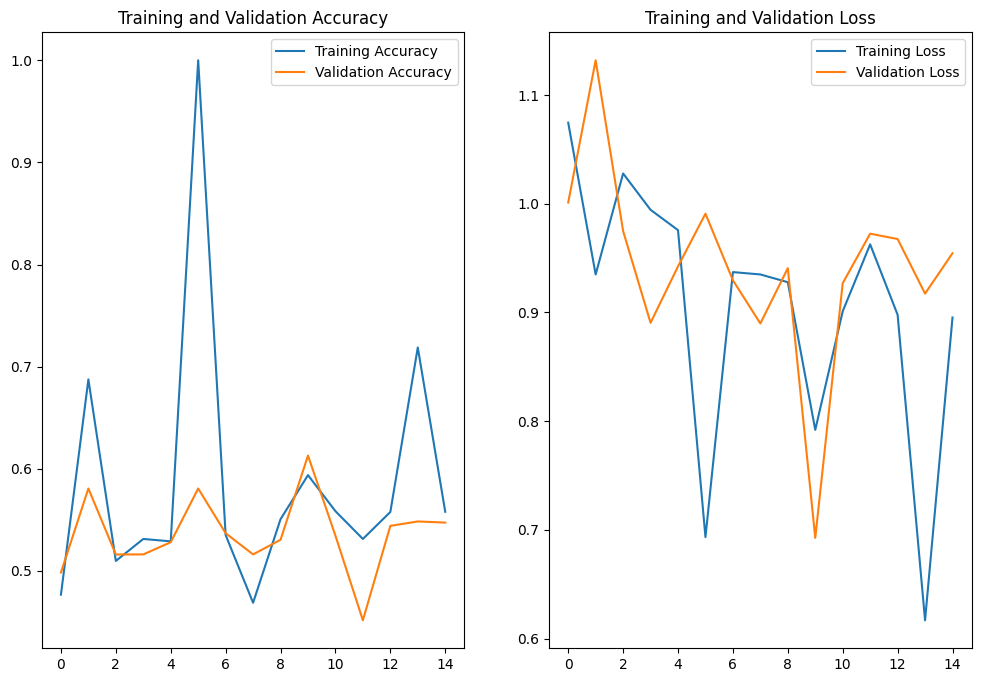

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt

# Define paths to your dataset
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Only rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Model building with the corrected input layer
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size)

# Evaluating the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def predict_image(image_path, model, class_labels):
    # Load the image
    img = load_img(image_path, target_size=(150, 150))
    # Convert the image to array
    img_array = img_to_array(img)
    # Rescale the image
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Map the predicted class to the corresponding label
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label

# Class labels as per the training data
class_labels = list(train_generator.class_indices.keys())

# Example usage
image_path = '26(19).jpg'  # Replace with the path to your image
predicted_label = predict_image(image_path, model, class_labels)
print(f'The predicted label for the image is: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
The predicted label for the image is: VeryMildDemented


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.4801 - loss: 1.1593 - val_accuracy: 0.5240 - val_loss: 1.0146
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 1.0015 - val_accuracy: 0.5484 - val_loss: 0.9391
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.5186 - loss: 1.0162 - val_accuracy: 0.5353 - val_loss: 0.9520
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6562 - loss: 0.9886 - val_accuracy: 0.4516 - val_loss: 0.8929
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.5432 - loss: 0.9527 - val_accuracy: 0.5361 - val_loss: 0.9524
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 0.8318 - val_accuracy: 0.4839 - val_loss: 1.0891
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.5340 - loss: 0.9752 - val_accuracy: 0.5425 - val_loss: 0.9203
Epoch 8/10
160/1

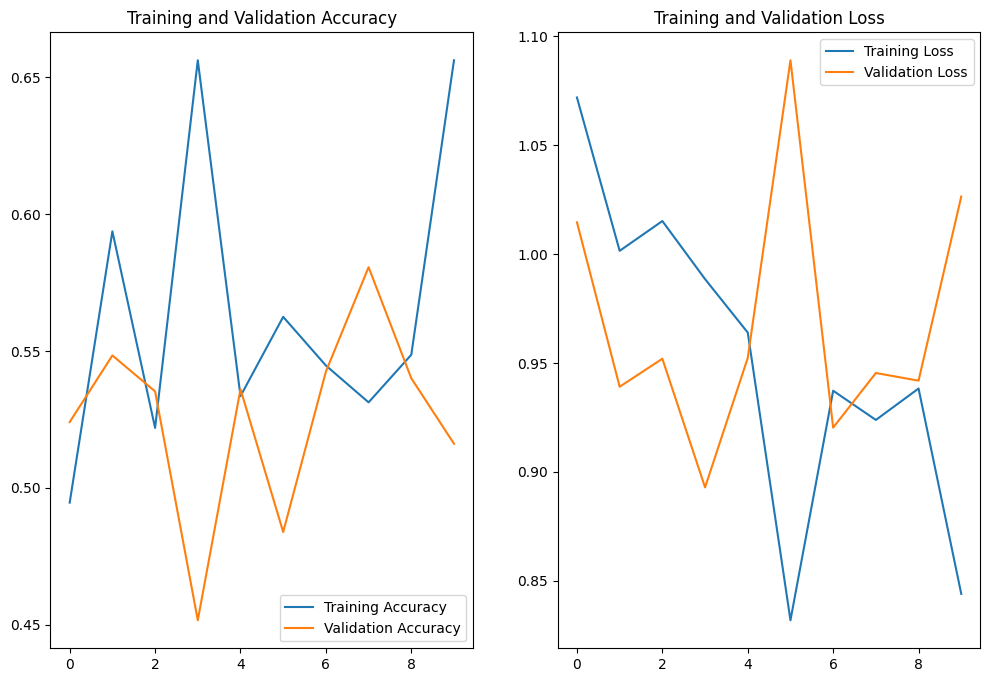

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt

# Define paths to your dataset
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Only rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Model building with the corrected input layer
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size)

# Evaluating the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
